In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

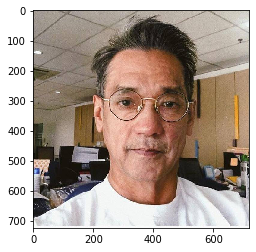

In [2]:
img = plt.imread('gambar.jpg')
plt.imshow(img)

resize

In [3]:
def resize(img):
    h, w = img.shape
    result = np.zeros ([int(h/2), int(w/2)])
    h, w = result.shape
    for i in range (h):
        for j in range (w):
            result [i,j] = img[i*2,j*2]
    return result

In [4]:
def rebuildsize(img):  
    h, w, layer = img.shape
    resizeRed = resize(img[:,:,0])
    resizeGreen = resize(img[:,:,1])
    resizeBlue = resize(img[:,:,2])

    result = np.zeros ([int(h/2), int(w/2), layer], dtype = int)
    result[:,:,0] = resizeRed
    result[:,:,1] = resizeGreen
    result[:,:,2] = resizeBlue

    return result

In [5]:
imgResize = rebuildsize(img).astype("uint8")
plt.imsave("imgResize.jpg", imgResize.astype("uint8"))

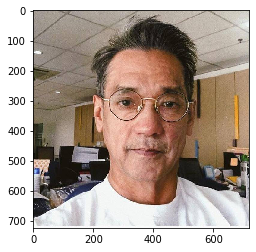

In [6]:
plt.imshow(img)

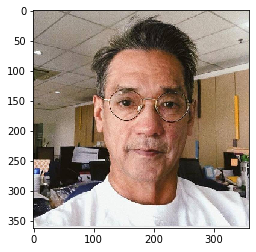

In [7]:
plt.imshow(imgResize)

sharpening

In [8]:
def filter (image, kernel):
    kernelH, kernelW = kernel.shape
    ci, cj = int((kernelH-1)/2), int((kernelW-1)/2)
    pad = np.pad(image, ((ci, kernelH-1-ci), (cj, kernelW-1-cj)), 'constant' )

    h, w = image.shape
    hasil = np.zeros(image.shape)
    for i in range (h):
        for j in range (w):
            for k in range (kernelW):
                for l in range (kernelH):
                    hasil[i,j] += pad[i+k,j+l] * kernel[k,l]
    return normalisasi (hasil)

def normalisasi (image):
    a, b = np.max(image), np.min(image)
    return ( ( (image-b)*255 )/ (a-b) )

In [9]:
def konvolusi(image, kernel):
    red = filter (image[:,:,0], kernel)
    green = filter (image[:,:,1], kernel)
    blue = filter (image[:,:,2], kernel)

    result = np.zeros(image.shape)
    result[:,:,0] = red
    result[:,:,1] = green
    result[:,:,2] = blue

    return result

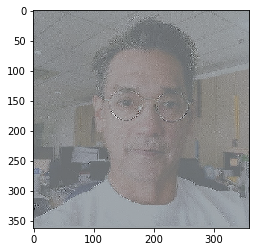

In [10]:
kernel = np.array([[1, -2, 1], [-1, 3, -1], [1, -2, 1]], dtype = int)
imgSharpen = konvolusi(imgResize, kernel).astype(int)
plt.imsave("imgSharpen.jpg", imgSharpen.astype("uint8"))
plt.imshow(imgSharpen)

convert to grayscale

In [11]:
resizeG = plt.imread("imgResize.jpg")
sharpG = plt.imread("imgSharpen.jpg")

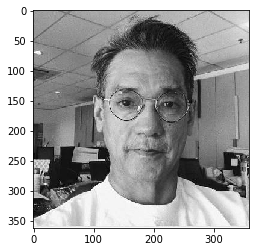

In [12]:
# menggunakan fungsi dari cv2 untuk mengubah menjadi gray
grayResize = cv2.cvtColor(resizeG, cv2.COLOR_RGB2GRAY)
plt.imshow(grayResize, cmap= "gray")

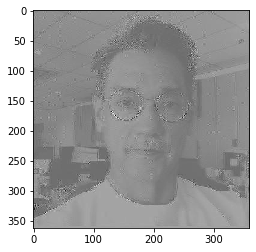

In [13]:
# Menggunakan fungsi dari cv2 untuk mengubah menjadi gray
graySharp = cv2.cvtColor(sharpG, cv2.COLOR_RGB2GRAY)
plt.imshow(graySharp, cmap= "gray")

histogram

In [14]:
def histogram(image):
    img = image.astype(int)
    sk = np.array ([x for x in range (256)], dtype= int)
    tinggi, lebar = img.shape
    n = tinggi*lebar
    nk = np.array([ np.count_nonzero(img == i) for i in range (256) ], dtype = int)
    p = np.array (nk/n)
    plt.bar(sk, p)
    return p

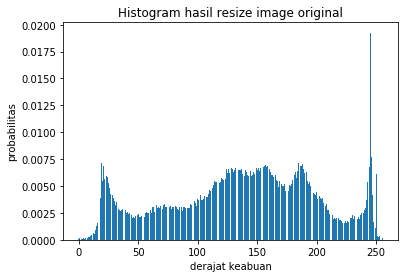

In [15]:
plt.title("Histogram hasil resize image original")
plt.xlabel("derajat keabuan")
plt.ylabel("probabilitas")
resizeH = histogram(grayResize)

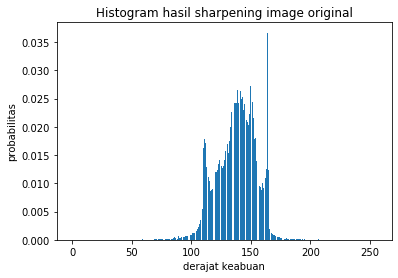

In [16]:
plt.title("Histogram hasil sharpening image original")
plt.xlabel("derajat keabuan")
plt.ylabel("probabilitas")
sharpH = histogram(graySharp)

mean

In [17]:
def mean(image):
    result = 0
    for i in range (len(image)):
        result =+ i*image[i]
    return result

variance

In [18]:
def variance(mean, image):
    result = 0
    for i in range (len(image)):
        result += math.pow (i-mean, 2) * image[i]
    return result

Skewness

In [19]:
def skewness(mean, image):
    result = 0
    for i in range (len(image)):
        result+= math.pow(i-mean, 3) * image[i]
    return result

Standar Deviasi

In [20]:
def standDeviasi (mean, image):
    result = 0
    for i in range (len(image)):
        result+= abs(i-m) * image[i]
    return result

Kurtois

In [21]:
def kurtois (mean, image):
    result = 0
    for i in range (len(image)):
        result+= math.pow(i-mean, 4) * image[i] -3
    return result

In [24]:
m = mean(resizeH)
print ("Mean            : ", m)
print ("Variance        : ", variance(m, resizeH))
print ("Skewness        : ", skewness(m, resizeH))
print ("Kurtosis        : ", kurtois(m, resizeH))
print ("Standar deviasi : ", standDeviasi(m, resizeH))

Mean            :  0.04891804788213628
Variance        :  22706.64307426305
Skewness        :  4143228.504315577
Kurtosis        :  804734169.5318506
Standar deviasi :  136.9606099206007


In [25]:
m1 = mean(sharpH)
print ("Mean            : ", m1)
print ("Variance        : ", variance(m1, sharpH))
print ("Skewness        : ", skewness(m1, sharpH))
print ("Kurtosis        : ", kurtois(m1, sharpH))
print ("Standar deviasi : ", standDeviasi(m1, sharpH))

Mean            :  0.0019567219152854514
Variance        :  19353.981790747293
Skewness        :  2747836.4127084985
Kurtosis        :  394940785.9125216
Standar deviasi :  138.07760971329105


Euclidean Distance

In [26]:
def euclidean (ori, sharp):
    h, w = ori.shape
    result = 0
    for i in range (h):
        for j in range (w):
            result += (math.pow(ori[i,j] - sharp[i,j], 2))
    return math.sqrt(result)

In [27]:
eucGray = np.array(grayResize, dtype = 'int64')
eucSharp = np.array(graySharp, dtype = 'int64')
print(euclidean(eucGray, eucSharp))

17768.109240996917
